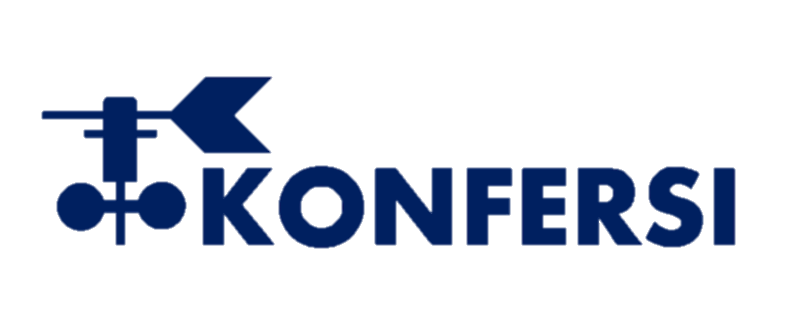

# ANALISIS SEA SURFACE TEMPERATURE DARI OISST

___Sekar Adiningsih - Oseanografi___

___KONFERSI INDONESIA___

Code ini mencakup beberapa materi, yaitu:

    1. Ekstrak Data Sea Surface Temperature dari OISST
    2. Komposit Data Sea Surface Temperature secara Klimatologi Bulanan
    3. Plot Peta Sea Surface Temperature Klimatologi Bulanan
    4. Kalkukasi dan Plot Anomali saat Tahun ENSO dan IOD

# SOFTWARE YANG DIPERLUKAN
Anda harus menginstall software di bawah ini agar dapat menjalankan code

    1. Python versi 3.x
    2. Miniconda3/Anaconda3
    3. Jupyter Notebook

# a) IMPORT LIBRARY YANG DIGUKANAN

_import_ - digunakan untuk memanggil library atau paket yang berasal dari environment miniconda3/anaconda3

_from_ - digunakan untuk memanggil fungsi dari librari/paket yang lebih khusus dari environment miniconda3/anaconda3

Library yang dipakai pada pelatihan ini dapat diinstal dengan cara berikut.

    1. pip install netcdf4
    2. pip install numpy
    3. pip install matplotlib
    4. pip install xarray
    5. pip install pandas
    6. pip install basemap

In [ ]:
from netCDF4 import Dataset
import netCDF4 as netcdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
import pandas as pd
import glob
import os
import sys
from mpl_toolkits.basemap import Basemap
from mpl_toolkits import basemap
import matplotlib as mpl
from tqdm import tqdm
%matplotlib inline

# b) FUNGSI UNTUK MENAMPILKAN SEMUA INFORMASI PADA DATA NC

_ncdump_ fungsi untuk menampilkan variabel, atribut, dan definisi lain dalam sebuah data netCDF4

In [ ]:
def ncdump(nc_fid, verb=True):
    def print_ncattr(key):
        try:
            print ("\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print ('\t\t%s:' % ncattr,repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print ("\t\tWARNING: %s does not contain variable attributes" % key)

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print ("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print ('\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]
    if verb:
        print ("NetCDF dimension information:")
        for dim in nc_dims:
            print ("\tName:", dim)
            print ("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    nc_vars = [var for var in nc_fid.variables]
    if verb:
        print ("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print ('\tName:', var)
                print ("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print ("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

# c) MEMBUKA DATA NETCDF4 DAN CROP DATA INDONESIA

_Dataset_ adalah fungsi untuk membuka data netCDF4 dan mengandung semua informasi di dalam variabel yang mewakili fungsi tersebut

_open_dataset_ adalah fungsi yang sama dengan _Dataset_, yaitu untuk membuka data netCDF4 namun memiliki struktur yang berbeda dengan _Dataset_

_for_ adalah sebuah perinta untuk menjalankan looping atau iterasi sesuai dengan _range_ yang telah ditentukan

_str_ adalah sebuah fungsi untuk mengubah tipe data menjadi _string_

_listdir_ adalah sebuah fungsi untuk mengetahui file dalam sebuah directory

_len_ adalah sebuah fungsi untuk mengetahui panjang/banyak suatu data

_tqdm_ adalah fungsi untuk menampilkan loading bar

_dataset.time_ adalah sebuah syntax untuk mengambil variabel waktu dalam dataset yang dibuka menggunakan xarray

_variables_ adalah fungsi untuk mengambil variable dari data netcdf yang dibuka menggunakan netcdf4

__Format waktu yang ditampilkan oleh Netcdf4 dan Xarray berbeda, sehingga menggunakan kedua library ini penting agar kita tidak perlu melakukan konversi tipe waktu atau membuat variabel waktu manual menggunakan _daterange___

_abs_ adalah suatu fungsi untuk mencari nilai absolut

_argmin_ adalah fungsi untuk mengembalikan suatu nilai minimum dalam suaty array di sumbu tertentu

_makedirs_ adalah suatu fungsi untuk membuat folder pada directory tertentu

_savez_ adalah fungsi untuk menyimpan file dalam bentuk .npz

In [ ]:
ncfile = netcdf.Dataset('D:/Data OISST/2020/20200101120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc')
nc_attrs, nc_dims, nc_vars = ncdump(ncfile)
dataset = xr.open_dataset('D:/Data OISST/2020/20200101120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc')
print(dataset)

In [ ]:
myLatmax=15
myLatmin=-15
myLonmax=150
myLonmin=90

for i in range(2002,2023,1):
    year = str(i)
    print(year)
    location = f'D:/Data OISST/{year}/'
    list = os.listdir(location)
    number_files = len(list)
    for j in tqdm(range(0, number_files,1)):
        ncfile = netcdf.Dataset(location+list[j])  
        dataset = xr.open_dataset(location+list[j])
        timez = dataset.time
        lat=ncfile.variables['lat'][:]
        lon=ncfile.variables['lon'][:]
        
        lonIdxmax=(np.abs(lon-myLonmax)).argmin()
        lonIdxmin=(np.abs(lon-myLonmin)).argmin()
        latIdxmax=(np.abs(lat-myLatmax)).argmin()
        latIdxmin=(np.abs(lat-myLatmin)).argmin()
            
        sst=np.array(ncfile.variables['analysed_sst'][0,latIdxmin:latIdxmax,lonIdxmin:lonIdxmax])
        lat1 = lat[latIdxmin:latIdxmax]
        lon1 = lon[lonIdxmin:lonIdxmax]
        
        date = str(timez[0])
        year = date[36:40]
        month = date[41:43]
        day = date[44:46]
        location2 = 'D:/Data OISST Pelatihan/Ekstrak/'+year+'/'+month+'/'
        try:
            os.makedirs(location2)
        except:
            a = 1
        sst_save = np.savez(location2+'sst_'+year+month+day+'.npz', a=sst, b=lat1, c=lon1)

# d) CHECKING DATA KOSONG DAN FILTER DATA KOSONG

_set_printoptions_ adalah untuk melakukan pengaturan pada hasil print, disini kita mengatur untuk melakukan print seluruh item untuk melihat data kosong

_load_ adalah fungsi untuk membuka data .npz


In [ ]:
np.set_printoptions(threshold=sys.maxsize)
location = 'D:/Data OISST Pelatihan/Ekstrak/'+year+'/'+month+'/'
data = np.load(location+'sst_'+year+month+day+'.npz')
sst_month = data['a']
latz = data['b']
lonz = data['c']

print(latz.shape,lonz.shape)
y = np.where((sst_month > 0), sst_month, 0)

# e) KOMPOSIT BULANAN PADA DATA OISST

_empty_ adalah fungsi untuk membuat array (matriks) dengan dimensi yang bisa kita tentukan

Pada syntax di bawah kita akan melakukan looping berdasarkan 3 level, yaitu looping harian, looping bulanan, kemudian looping tahunan. Sehingga akan di dapatkan komposit bulanan yang hasilnya adalah 12 file dari bulan Januari-Desember tiap tahunnya.

Hasil dari komposit ini kemudian di save dalam bentuk .npz

In [ ]:
sst_month = np.empty([341,682])
month_sst = np.empty([341,682])
num_sst_month = np.empty([341,682])

for i in tqdm(range(2003,2023,1)):
    year = str(i)
    for j in range(1,13,1):
        if j < 10:
            month = '0'+str(j)
        else:
            month = str(j)
        location = 'D:/Data OISST Pelatihan/Ekstrak/'+year+'/'+month+'/'
        list = os.listdir(location)
        number_files = len(list)
        for k in range(0,number_files,1):
            data = np.load(location+list[k])
            sst_data = data['a']
            sst_month = sst_month+sst_data 
            latz = data['b']
            lonz = data['c']
            index = np.where(sst_month != 0)
            num_sst_month[index] = num_sst_month[index]+1
        month_sst = sst_month/num_sst_month
        sst_month = sst_month*0
        num_sst_month = num_sst_month*0
        location2 = 'D:/Data OISST Pelatihan/Monthly/'+year+'/'
        try:
            os.makedirs(location2)
        except:
            n=1
        sst_save = np.savez(location2+'vst_'+year+month+'.npz', a=month_sst, b=latz, c=lonz)

# f) KOMPOSIT KLIMATOLOGI BULANAN PADA DATA AQUA MODIS

_empty_ adalah fungsi untuk membuat array (matriks) dengan dimensi yang bisa kita tentukan

Pada syntax di bawah kita akan melakukan looping berdasarkan 2 level, yaitu looping tahun, kemudian looping bulan. Sehingga akan di dapatkan komposit klimatologi bulanan yang hasilnya adalah 12 file dari bulan Januari-Desember.

Hasil dari komposit ini kemudian di save dalam bentuk .npz

In [ ]:
sst_clim = np.empty([341,682])
clim_sst = np.empty([341,682])
num_sst_clim = np.empty([341,682])

for i in tqdm(range(1,13,1)):
    if i < 10:
         month = '0'+str(i)
    else:
        month = str(i)
    for j in range(2003,2023,1):
        year = str(j)
        location = 'D:/Data OISST Pelatihan/Monthly/'+year+'/'
        data = np.load(location+'vst_'+year+month+'.npz')
        sst_clim = sst_clim+data['a']
        latz = data['b']
        lonz = data['c']
        index = np.where(sst_clim != 0)
        num_sst_clim[index] = num_sst_clim[index]+1
    clim_sst = sst_clim/num_sst_clim
    sst_clim_num = num_sst_clim
    
    sst_clim= sst_clim*0
    num_sst_clim = num_sst_clim*0

    location2 = 'D:/Data OISST Pelatihan/Klimatologi/'
    try:
        os.makedirs(location2)
    except:
        n=1
    sst_save = np.savez(location2+'vst_'+month+'.npz', a=clim_sst, b=latz, c=lonz)

# g) CHECKING DATA KOSONG PADA HASIL KOMPOSIT

In [ ]:
print(clim_sst[0:300,0:300])

# h) PLOTING DATA KLIMATOLOGI OISST

_meshgrid_ adalah fungsi untuk membuat grid dari data 1D menjadi 2D, tujuannya adalah untuk membuat data koordinat menjadi 2D.

_figure_ adalah fungsi untuk mengatur gambar pada hasil ploting.

_Basemap_ adalah fungsi untuk menampilkan gambar peta yang akan kita overlay dengan hasil klimatologi.

_contourf_ adalah fungsi untuk membuat kontur yang terisi warna dari data OISST klimatologi.

_colorbar_ adalah pengaturan untuk menampilkan colorbar.

_drawmapboundary_ adalah fungsi untuk membuat batas pada peta.

_fillcontinents_ adalah fungsi untuk membuat pulau pulau.

_drawcoastlines_ adalah fungsi untuk membuat garis pantai.

_arange_ adalah fungsi yang sama dengan _range_ yaitu untuk membuat skala angka.

_drawparallels_ adalah fungsi untuk membuat tampilan latitude pada peta.

_drawmeridians_ adalah fungsi untuk membuat tampilan longitude pada peta.

In [ ]:
for i in range(1,13,1):
    if i < 10:
        month = '0'+str(i)
    else:
        month = str(i)
    location2 = 'D:/Data OISST Pelatihan/Klimatologi/'
    data2 = np.load(location2+f'vst_{month}.npz')
    sst_month2 = data2['a']-273.15
    latz = data2['b']
    lonz = data2['c']
    lat2,lon2 = np.meshgrid(lonz,latz)
    plt.figure(figsize=(12,9),facecolor='white')
    map=Basemap(projection='mill',lat_ts=10,llcrnrlon=np.min(lonz),\
                urcrnrlon=np.max(lonz),llcrnrlat=np.min(latz),urcrnrlat=np.max(latz),resolution='l')
    lat_sng, lon_sng = map(lat2,lon2)
    
    clim_sst = np.where(sst_month2 > 0, sst_month2, np.nan)
    
    CF = map.contourf(lat_sng, lon_sng,clim_sst,100,cmap='jet')
    clb=map.colorbar(CF, location='right', pad='5%', label='Sea Surface Temperature ${^oC}$')#, ticks=np.arange(0, 1, 0.2))
    clb.ax.tick_params(labelsize=13) 
    map.drawmapboundary()
    map.fillcontinents(color='#808080',lake_color='aqua')
    map.drawcoastlines()
    parallels = np.arange(-20,20,6)
    map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12)   # menggambar garis lintang
    meridians = np.arange(90,150,15)
    map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12)   # menggambar garis bujur
    plt.title('Sea Surface Temperature OISST \n'
            'Indonesia Sea \n'
            f'{month}', loc = 'left', fontsize = 14)
    location_plot = 'D:/Data OISST Pelatihan/Klimatologi Plot/'
    try:
        os.makedirs(location_plot)
    except:
        n=1
    plt.savefig(f'D:/Data OISST Pelatihan/Klimatologi Plot/sstclim_{month}.png')
    plt.show()

# k) PERHITUNGAN ANOMALI OISST DAN PLOTING PETA ANOMALI OISST

Perhitungan anomali OISST dapat dilakukan dengan cara mengurangi data klimatologi bulanan dengan data bulanan pada tahun yang kita inginkan.

In [ ]:
for i in range(1,13,1):
    year = '2015'
    if i < 10:
        month = '0'+str(i)
    else:
        month = str(i)
    location = f'D:/Data OISST Pelatihan/Monthly/{year}/'
    data = np.load(location+f'vst_{year}{month}.npz')
    sst_month = data['a']

    location2 = 'D:/Data OISST Pelatihan/Klimatologi/'
    data2 = np.load(location2+f'vst_{month}.npz')
    sst_month2 = data2['a']
    lonz = data2['c']
    latz = data2['b']
    
    sst_tot = sst_month-sst_month2
    
    sst1 = np.where((sst_tot < 1), sst_tot, 1)
    sst2 = np.where((sst1 > -1), sst1, -1)
    
    
    import matplotlib as mpl
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    lat2,lon2 = np.meshgrid(lonz,latz)
    fig = plt.figure(figsize=(15,10),facecolor='white')
    map=Basemap(projection='mill',lat_ts=10,llcrnrlon=np.min(lonz),\
                urcrnrlon=np.max(lonz),llcrnrlat=np.min(latz),urcrnrlat=np.max(latz),resolution='l')
    lat_sng, lon_sng = map(lat2,lon2)
    tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    CF = map.contourf(lat_sng, lon_sng,sst2,100,cmap='seismic',extend='both')
    clb=map.colorbar(CF, location='right', ticks=np.arange(-1, 1.05, 0.5), pad='5%', shrink=0.7, label='Sea Surface Temperature Anomaly ${^oC}$')
    clb.ax.tick_params(labelsize=15)
    map.drawmapboundary()
    map.fillcontinents(color='#ffffff',lake_color='aqua')
    map.drawcoastlines()
    parallels = np.arange(-20,20,5)
    map.drawparallels(parallels,labels=[True,False,False,False],fontsize=15)   # menggambar garis lintang
    meridians = np.arange(90,150,15)
    map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=15)
    plt.title('Sea Surface Temperature Anomaly OISST \n'
        'Indonesia Sea \n'
        f'{year}{month}', loc = 'left', fontsize = 14)
    location_plot = 'D:/Data OISST Pelatihan/Klimatologi Anomali Plot/'
    try:
        os.makedirs(location_plot)
    except:
        n=1
    plt.savefig(f'D:/Data OISST Pelatihan/Klimatologi Anomali Plot/sstclimanom_{month}.png')
    plt.show()

# l) PLOTING MAP BULANAN SELAMA 1 TAHUN

In [ ]:
for i in range(1,13,1):
    year = '2015'
    if i < 10:
        month = '0'+str(i)
    else:
        month = str(i)
    location = f'D:/Data OISST Pelatihan/Monthly/{year}/'
    data = np.load(location+f'vst_{year}{month}.npz')
    sst_month = data['a'] - 273.15
    lonz = data['c']
    latz = data['b']
    
    sst_month = np.where(sst_month > 0, sst_month, np.nan)
    import matplotlib as mpl
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    lat2,lon2 = np.meshgrid(lonz,latz)
    fig = plt.figure(figsize=(15,10),facecolor='white')
    map=Basemap(projection='mill',lat_ts=10,llcrnrlon=np.min(lonz),\
                urcrnrlon=np.max(lonz),llcrnrlat=np.min(latz),urcrnrlat=np.max(latz),resolution='l')
    lat_sng, lon_sng = map(lat2,lon2)
    tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    CF = map.contourf(lat_sng, lon_sng,sst_month,100,cmap='jet',extend='both')
    clb=map.colorbar(CF, location='right', pad='5%', shrink=0.7,label='Sea Surface Temperature ${^oC}$')
    clb.ax.tick_params(labelsize=15)
    map.drawmapboundary()
    map.fillcontinents(color='#ffffff',lake_color='aqua')
    map.drawcoastlines()
    parallels = np.arange(-20,20,5)
    map.drawparallels(parallels,labels=[True,False,False,False],fontsize=15)   # menggambar garis lintang
    meridians = np.arange(90,150,15)
    map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=15)
    plt.title('Sea Surface Temperature OISST \n'
        'Indonesia Sea \n'
        f'{year}{month}', loc = 'left', fontsize = 14)
    location_plot = f'D:/Data OISST Pelatihan/Monthly {year}/'
    try:
        os.makedirs(location_plot)
    except:
        n=1
    plt.savefig(f'D:/Data OISST Pelatihan/Monthly {year}/sstmonth_{month}.png')
    plt.show()

# ============================================================
# ============================================================
# ====================== OPTIONAL =============================

# m) PLOT MAP ANOMALI DARI TAHUN YANG KITA INGINKAN SECARA RANGE WAKTU

In [ ]:
for j in range(2003,2022,1):
    for i in range(1,13,1):
        year = str(j)
        if i < 10:
            month = '0'+str(i)
        else:
            month = str(i)
        location = f'D:/Data OISST Pelatihan/Monthly/{year}/'
        data = np.load(location+f'vst_{year}{month}.npz')
        sst_month = data['a']

        location2 = 'D:/Data OISST Pelatihan/Klimatologi/'
        data2 = np.load(location2+f'vst_{month}.npz')
        sst_month2 = data2['a']
        lonz = data2['c']
        latz = data2['b']

        sst_tot = sst_month-sst_month2

        sst1 = np.where((sst_tot < 1), sst_tot, 1)
        sst2 = np.where((sst1 > -1), sst1, -1)


        import matplotlib as mpl
        csfont = {'fontname':'Comic Sans MS'}
        hfont = {'fontname':'Helvetica'}
        lat2,lon2 = np.meshgrid(lonz,latz)
        fig = plt.figure(figsize=(15,10),facecolor='white')
        map=Basemap(projection='mill',lat_ts=10,llcrnrlon=np.min(lonz),\
                    urcrnrlon=np.max(lonz),llcrnrlat=np.min(latz),urcrnrlat=np.max(latz),resolution='l')
        lat_sng, lon_sng = map(lat2,lon2)
        tick_locator = mpl.ticker.MaxNLocator(nbins=5)
        CF = map.contourf(lat_sng, lon_sng,sst2,100,cmap='seismic',extend='both')
        clb=map.colorbar(CF, location='right', ticks=np.arange(-1, 1.05, 0.5), pad='5%', shrink=0.7, label='Sea Surface Temperature Anomaly ${^oC}$')
        clb.ax.tick_params(labelsize=15)
        map.drawmapboundary()
        map.fillcontinents(color='#ffffff',lake_color='aqua')
        map.drawcoastlines()
        parallels = np.arange(-20,20,5)
        map.drawparallels(parallels,labels=[True,False,False,False],fontsize=15)   # menggambar garis lintang
        meridians = np.arange(90,150,15)
        map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=15)
        plt.title('Sea Surface Temperature Anomaly OISST \n'
            'Indonesia Sea \n'
            f'{year}{month}', loc = 'left', fontsize = 14)
        location2 = 'D:/Data OISST Pelatihan/Monthly Anomali/'
        try:
            os.makedirs(location2)
        except:
            n=1
        plt.savefig(f'D:/Data OISST Pelatihan/Monthly Anomali/anomalySST_{year}{month}.png')
        plt.show()

# n) PLOT MAP BULANAN DARI TAHUN YANG KITA INGINKAN SECARA RANGE WAKTU

In [ ]:
for j in range(2003,2022,1):
    for i in range(1,13,1):
        year = str(j)
        if i < 10:
            month = '0'+str(i)
        else:
            month = str(i)
        location = f'D:/Data OISST Pelatihan/Monthly/{year}/'
        data = np.load(location+f'vst_{year}{month}.npz')
        sst_month = data['a'] - 273.15
        lonz = data['c']
        latz = data['b']

        sst_month = np.where(sst_month > 0, sst_month, np.nan)
        import matplotlib as mpl
        csfont = {'fontname':'Comic Sans MS'}
        hfont = {'fontname':'Helvetica'}
        lat2,lon2 = np.meshgrid(lonz,latz)
        fig = plt.figure(figsize=(15,10),facecolor='white')
        map=Basemap(projection='mill',lat_ts=10,llcrnrlon=np.min(lonz),\
                    urcrnrlon=np.max(lonz),llcrnrlat=np.min(latz),urcrnrlat=np.max(latz),resolution='l')
        lat_sng, lon_sng = map(lat2,lon2)
        tick_locator = mpl.ticker.MaxNLocator(nbins=5)
        CF = map.contourf(lat_sng, lon_sng,sst_month,100,cmap='jet',extend='both')
        clb=map.colorbar(CF, location='right', pad='5%', shrink=0.7,label='Sea Surface Temperature ${^oC}$')
        clb.ax.tick_params(labelsize=15)
        map.drawmapboundary()
        map.fillcontinents(color='#ffffff',lake_color='aqua')
        map.drawcoastlines()
        parallels = np.arange(-20,20,5)
        map.drawparallels(parallels,labels=[True,False,False,False],fontsize=15)   # menggambar garis lintang
        meridians = np.arange(90,150,15)
        map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=15)
        plt.title('Sea Surface Temperature OISST \n'
            'Indonesia Sea \n'
            f'{year}{month}', loc = 'left', fontsize = 14)
        location2 = 'D:/Data OISST Pelatihan/Monthly Plot/'
        try:
            os.makedirs(location2)
        except:
            n=1
        plt.savefig(f'D:/Data OISST Pelatihan/Monthly Plot/SST_{year}{month}.png')
        plt.show()

# o) Time Series Bulanan to Excel

In [ ]:
#121.047363,-10.109486,123.079834,-9.112945

myLatmax=-9.112945
myLatmin=-10.109486
myLonmax=123.079834
myLonmin=121.047363

sst_timeseries = []
timeseries_t = []

for i in tqdm(range(2003,2023,1)):
    for j in range(1,13,1):
        year = str(i)
        idx = j-1
        if j < 10:
            month = '0'+str(j)
        else:
            month = str(j)
        location = f'D:/Data OISST Pelatihan/Monthly/{year}/'
        data = np.load(location+f'vst_{year}{month}.npz')
    
        lon = data['c']
        lat = data['b']
        
        lonIdxmax=(np.abs(lon-myLonmax)).argmin()
        lonIdxmin=(np.abs(lon-myLonmin)).argmin()
        latIdxmax=(np.abs(lat-myLatmax)).argmin()
        latIdxmin=(np.abs(lat-myLatmin)).argmin()
            
        sst_month = np.mean(data['a'][latIdxmin:latIdxmax,lonIdxmin:lonIdxmax]-273.15)
        
        timeseries = f'{year+month}'
        timeseries_t = np.insert(timeseries_t,idx,timeseries, axis=0)
        sst_timeseries = np.insert(sst_timeseries,idx,sst_month, axis=0)
        
        location2 = 'D:/Data OISST Pelatihan/Time Series/'
        try:
            os.makedirs(location2)
        except:
            a = 1
    df = pd.DataFrame(timeseries_t)
    df.insert(1,'SST',sst_timeseries)
    df.to_excel(f'D:/Data OISST Pelatihan/Time Series/timeseriesmonthly_sst.xlsx')

# p) Time Series Klimatologi to Excel

In [ ]:
#121.047363,-10.109486,123.079834,-9.112945

sst_clim = np.empty([160,320])

myLatmax=-9.112945
myLatmin=-10.109486
myLonmax=123.079834
myLonmin=121.047363

sst_timeseries = []
timeseries_t = []

for i in tqdm(range(1,13,1)):
    k = i-1
    if i < 10:
        month = '0'+str(i)
    else:
        month = str(i)
    location = f'D:/Data OISST Pelatihan/Klimatologi/'
    
    data2 = np.load(location+f'vst_{month}.npz')
    
    lat = data2['b']
    lon = data2['c']

    lonIdxmax=(np.abs(lon-myLonmax)).argmin()
    lonIdxmin=(np.abs(lon-myLonmin)).argmin()
    latIdxmax=(np.abs(lat-myLatmax)).argmin()
    latIdxmin=(np.abs(lat-myLatmin)).argmin()
    sst_clim = np.mean((data2['a'][latIdxmin:latIdxmax,lonIdxmin:lonIdxmax]-273.15))
        
    timeseries = f'{month}'
    timeseries_t = np.insert(timeseries_t,k,timeseries, axis=0)
    sst_timeseries = np.insert(sst_timeseries,k,sst_clim, axis=0)
        
    location2 = 'D:/Data OISST Pelatihan/Time Series/'
    try:
        os.makedirs(location2)
    except:
        a = 1
df = pd.DataFrame(timeseries_t)
df.insert(1,'SST',sst_timeseries)
df.to_excel(f'D:/Data OISST Pelatihan/Time Series/timeseriesclim_sst.xlsx')

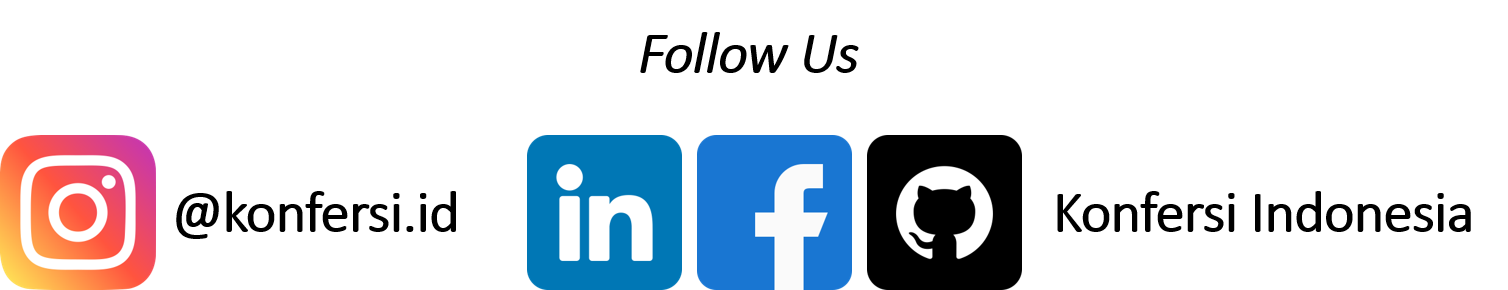